In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder



data  = pd.read_csv('~/Downloads/UNSW_NB15_testing-set.csv')

In [5]:
def calculate_correlations(X, y):
    """
    Calculate correlations between features (X) and target (y).
    - Point-Biserial Correlation for numerical features.
    - Cramér's V for categorical features.
    """
    correlations = {}
    
    # Encode the target if it's categorical
    if y.dtype == 'object' or y.dtype.name == 'category':
        le = LabelEncoder()
        y = le.fit_transform(y)
    
    for column in X.columns:
        print(X[column].dtype)
        if X[column].dtype in ['int64', 'float64']:  # Numerical features
            corr, _ = pointbiserialr(X[column], y)
            correlations[column] = corr
        elif X[column].dtype == 'object':  # Categorical features
            # Convert to one-hot encoding and compute correlation
            dummies = pd.get_dummies(X[column], drop_first=True)
            corr = dummies.corrwith(pd.Series(y)).abs().mean()
            correlations[column] = corr
        else:
            correlations[column] = 0  # Assign 0 for unhandled cases
    
    return correlations

float64
object
object
object
int64
int64
int64
int64
float64
int64
int64
float64
float64
int64
int64
float64
float64
float64
float64
int64
int64
int64
int64
float64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
object


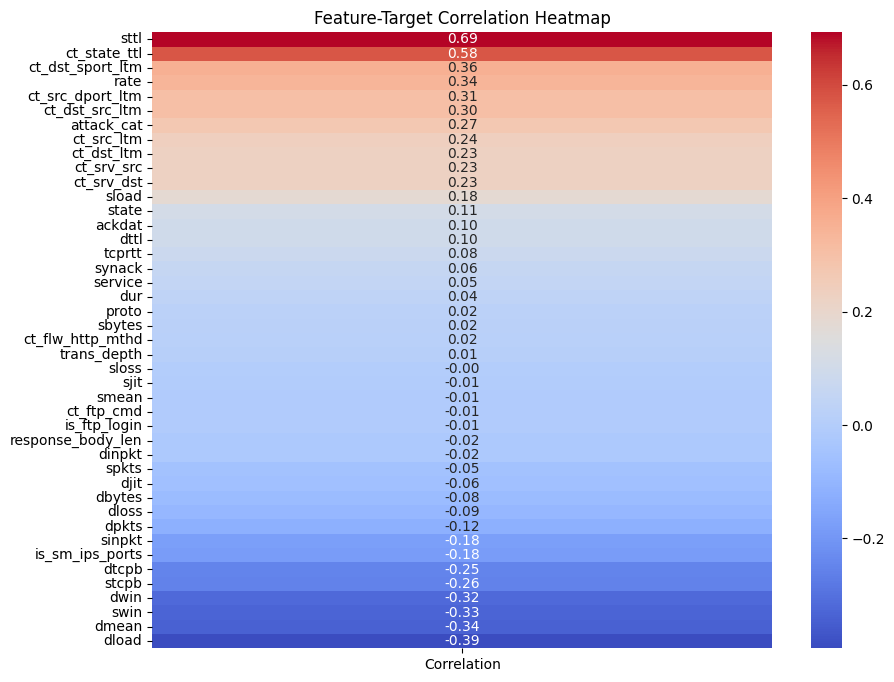

In [6]:
# Prepare features and target
X = data.drop(columns=['id','label']) 
y = data['label']

# Fill missing values
X.fillna(0, inplace=True)

# Calculate correlations
correlations = calculate_correlations(X, y)

# Create a DataFrame for the heatmap
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation']).sort_values(by='Correlation', ascending=False)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title("Feature-Target Correlation Heatmap")
plt.show()
